In [79]:
import os
import pandas as pd
import numpy as np

In [80]:
rawdata_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\01_raw"
reporting_loc = "D:\Projects_IndranilDa\Customer_Acq_Model\customer_acq_model\data\\03_reporting" 

In [81]:
## pulling raw media - sales - customer demography - cost of acq cutomers
data = pd.read_csv(f"{rawdata_loc}\\media_costs_data.csv")
data.head(5)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,...,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3,Double Down Sale,USA,M,M,...,18670,5415,3610,1,1,1,1,1,Radio,50.79


In [82]:
data.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [83]:
## sales, revenue and cost on food category, food dept., food family  (store_sales is revenue)

In [84]:
## Revenue = No. of cost per unit * no. of unit sold (cost/unit  * unit sold)

In [85]:
## Revenue Generated / food category
def revenue_generated(data):

    revenuetable = data.groupby('food_category').agg(Revenue = pd.NamedAgg('store_sales(in millions)', 'sum'),
                                                     Cost = pd.NamedAgg('store_cost(in millions)', 'sum'),
                                                     Demand = pd.NamedAgg('unit_sales(in millions)', 'sum'))
    
    # Sorting by the 'Revenue' column in descending order
    revenuetable = revenuetable.sort_values(by='Revenue', ascending=False)

    ## ROI Calculation
    revenuetable['roi'] = revenuetable.Revenue/revenuetable.Cost
    
    return revenuetable

revenuetable_FC = revenue_generated(data = data)
revenuetable_FC

,Revenue,Cost,Demand,roi
food_category,,,,
Vegetables,50067.64,20059.2579,23041,2.495987
Snack Foods,47726.96,19115.3878,21491,2.496782
Dairy,25705.33,10335.8544,11825,2.487006
Meat,21206.17,8470.7505,9622,2.503458
Fruit,20134.93,8063.4484,9529,2.497062
Jams and Jellies,15400.78,6132.6088,7831,2.511293
Bread,11813.05,4728.0011,5552,2.498529
Breakfast Foods,11328.06,4535.8428,6025,2.497454
Baking Goods,11313.59,4523.1481,6037,2.501265


In [86]:
## Top 10 Food_Category to give us highest revenue

In [87]:
## ROI =  Revenue / Cost   (Return on Investment)

In [88]:
## Top 10 revenue generators vs Top 10 roi generators

In [89]:
# Getting Top 10 Revenue Generators
top_10_revenue = revenuetable_FC.nlargest(10, 'Revenue')

# Geting Top 10 ROI Generators
top_10_roi = revenuetable_FC.nlargest(10, 'roi')

# print(top_10_revenue, top_10_roi)  #profit = revenue - cost, per capita profit of items = demand / profit

In [90]:
top_10_revenue

,Revenue,Cost,Demand,roi
food_category,,,,
Vegetables,50067.64,20059.2579,23041,2.495987
Snack Foods,47726.96,19115.3878,21491,2.496782
Dairy,25705.33,10335.8544,11825,2.487006
Meat,21206.17,8470.7505,9622,2.503458
Fruit,20134.93,8063.4484,9529,2.497062
Jams and Jellies,15400.78,6132.6088,7831,2.511293
Bread,11813.05,4728.0011,5552,2.498529
Breakfast Foods,11328.06,4535.8428,6025,2.497454
Baking Goods,11313.59,4523.1481,6037,2.501265


In [91]:
top_10_roi

,Revenue,Cost,Demand,roi
food_category,,,,
Canned Clams,1274.46,497.0866,630,2.563859
Plastic Products,4622.67,1825.9742,1808,2.531618
Carbonated Beverages,4467.83,1773.1219,2427,2.519753
Canned Sardines,868.28,345.6828,534,2.511782
Jams and Jellies,15400.78,6132.6088,7831,2.511293
Seafood,2470.42,984.0403,1164,2.510487
Canned Tuna,2320.84,925.1180,1207,2.508696
Frozen Entrees,4183.06,1669.8595,1857,2.505037
Starchy Foods,7790.06,3110.1617,3433,2.504712


Observation: 
     From the revenue table of the food_category above, it is clear that that the top 10 revenue generators of the Business might not be the top 10 ROI generators fo the business. There could be a case where this observation could be due to the customer demands in the area of demography

In [92]:
## Exploring the cost vs Revenue of the inverted pyramidal structure of the Food Category - Department - Family:

def revenue_generated(data, col_names):

    revenuetable = data.groupby(col_names).agg(Revenue = pd.NamedAgg('store_sales(in millions)', 'sum'),
                                                     Cost = pd.NamedAgg('store_cost(in millions)', 'sum'),
                                                     Demand = pd.NamedAgg('unit_sales(in millions)', 'sum'))
    revenuetable = revenuetable.sort_values(by='Revenue', ascending=False)
    revenuetable['roi'] = revenuetable.Revenue/revenuetable.Cost
    
    return revenuetable

revenuetable_FD = revenue_generated(data = data, col_names = 'food_department')
revenuetable_FD

,Revenue,Cost,Demand,roi
food_department,,,,
Produce,56914.58,22787.2701,26361,2.497648
Snack Foods,47726.96,19115.3878,21491,2.496782
Household,42579.56,17043.4544,19089,2.498294
Frozen Foods,39055.11,15647.3022,18909,2.495964
Canned Foods,27085.84,10876.5089,13079,2.490306
Baking Goods,26714.37,10655.7569,13868,2.507036
Dairy,25705.33,10335.8544,11825,2.487006
Health and Hygiene,23860.63,9577.4205,11767,2.491342
Beverages,19003.40,7591.0691,9324,2.503389


In [93]:
# Getting Top 10 Revenue Generators
top_10_revenue_FD = revenuetable_FD.nlargest(10, 'Revenue')

# Geting Top 10 ROI Generators
top_10_roi_FD = revenuetable_FD.nlargest(10, 'roi')

In [94]:
top_10_revenue_FD

,Revenue,Cost,Demand,roi
food_department,,,,
Produce,56914.58,22787.2701,26361,2.497648
Snack Foods,47726.96,19115.3878,21491,2.496782
Household,42579.56,17043.4544,19089,2.498294
Frozen Foods,39055.11,15647.3022,18909,2.495964
Canned Foods,27085.84,10876.5089,13079,2.490306
Baking Goods,26714.37,10655.7569,13868,2.507036
Dairy,25705.33,10335.8544,11825,2.487006
Health and Hygiene,23860.63,9577.4205,11767,2.491342
Beverages,19003.40,7591.0691,9324,2.503389


In [95]:
top_10_roi_FD

,Revenue,Cost,Demand,roi
food_department,,,,
Meat,2486.86,984.3473,1199,2.526405
Seafood,2470.42,984.0403,1164,2.510487
Baking Goods,26714.37,10655.7569,13868,2.507036
Starchy Foods,7790.06,3110.1617,3433,2.504712
Deli,18068.32,7217.5224,8638,2.503396
Beverages,19003.40,7591.0691,9324,2.503389
Eggs,6398.62,2558.0635,2926,2.501353
Snacks,10141.97,4056.9256,4822,2.499915
Baked Goods,11813.05,4728.0011,5552,2.498529


In [96]:
## food family
revenuetable_FF = revenue_generated(data = data, col_names = 'food_family')
revenuetable_FF

,Revenue,Cost,Demand,roi
food_family,,,,
Food,284614.54,113970.3556,133901,2.497268
Non-Consumable,76468.46,30650.1962,35714,2.494877
Drink,34178.40,13668.1469,17299,2.500588


In [97]:
## top 10 revenue generators vs top 10 roi generators

In [98]:
# Getting Top 10 Revenue Generators
top_10_revenue = revenuetable_FF.nlargest(10, 'Revenue')

# Geting Top 10 ROI Generators
top_10_roi = revenuetable_FF.nlargest(10, 'roi')

In [99]:
top_10_revenue

,Revenue,Cost,Demand,roi
food_family,,,,
Food,284614.54,113970.3556,133901,2.497268
Non-Consumable,76468.46,30650.1962,35714,2.494877
Drink,34178.40,13668.1469,17299,2.500588


In [100]:
top_10_roi

,Revenue,Cost,Demand,roi
food_family,,,,
Drink,34178.40,13668.1469,17299,2.500588
Food,284614.54,113970.3556,133901,2.497268
Non-Consumable,76468.46,30650.1962,35714,2.494877


In [101]:
## Reevenue - Demand across all 3 lines of food family

revenueline = data.groupby(['food_family', 'food_department', 'food_category']).agg(Revenue = pd.NamedAgg('store_sales(in millions)', 'sum'),
                                                     Cost = pd.NamedAgg('store_cost(in millions)', 'sum'),
                                                     Demand = pd.NamedAgg('unit_sales(in millions)', 'sum'))
revenueline = revenueline.sort_values(by='Revenue', ascending=False)
revenueline['roi'] = revenueline.Revenue/revenueline.Cost
revenueline

Revenue        Cost  \
food_family    food_department     food_category                                
Food           Snack Foods         Snack Foods           47726.96  19115.3878   
               Produce             Vegetables            31777.87  12722.8269   
               Dairy               Dairy                 20626.94   8307.3254   
               Produce             Fruit                 17863.05   7146.6596   
               Baking Goods        Jams and Jellies      15400.78   6132.6088   
               Deli                Meat                  14710.30   5865.9227   
               Baked Goods         Bread                 11813.05   4728.0011   
               Baking Goods        Baking Goods          11313.59   4523.1481   
Non-Consumable Household           Electrical            11147.72   4477.1918   
                                   Paper Products        10767.78   4304.3053   
Food           Canned Foods        Canned Soup           10419.14   4190.5216   
               Frozen Foods        Vegetables            10365.33   4155.1374   
               Snacks              Candy                 10141.97   4056.9256   
Drink          Alcoholic Beverages Beer and Wine         10096.61   4048.5488   
Food           Frozen Foods        Frozen Desserts        9329.26   3735.1895   
Non-Consumable Health and Hygiene  Bathroom Products      8549.83   3423.6980   
Food           Canned Foods        Vegetables             7924.44   3181.2936   
               Starchy Foods       Starchy Foods          7790.06   3110.1617   
Non-Consumable Household           Kitchen Products       6823.04   2728.9778   
               Health and Hygiene  Pain Relievers         6511.23   2621.3690   
Food           Eggs                Eggs                   6398.62   2558.0635   
               Frozen Foods        Breakfast Foods        6278.50   2510.8892   
Non-Consumable Periodicals         Magazines              6207.53   2490.2450   
Food           Produce             Specialty              6093.29   2443.0965   
Drink          Beverages           Hot Beverages          5856.23   2342.0334   
               Dairy               Dairy                  5078.39   2028.5290   
Food           Breakfast Foods     Breakfast Foods        5049.56   2024.9536   
               Frozen Foods        Pizza                  4889.95   1955.7461   
Non-Consumable Household           Cleaning Supplies      4729.24   1907.0914   
                                   Plastic Products       4622.67   1825.9742   
Drink          Beverages           Carbonated Beverages   4467.83   1773.1219   
                                   Pure Juice Beverages   4458.40   1783.0764   
Non-Consumable Health and Hygiene  Hygiene                4445.85   1784.4037   
Drink          Beverages           Drinks                 4220.94   1692.8374   
Food           Frozen Foods        Frozen Entrees         4183.06   1669.8595   
                                   Meat                   4009.01   1620.4805   
               Deli                Side Dishes            3358.02   1351.5997   
Non-Consumable Household           Hardware               2649.06   1059.2678   
Food           Meat                Meat                   2486.86    984.3473   
               Seafood             Seafood                2470.42    984.0403   
               Canned Foods        Canned Tuna            2320.84    925.1180   
               Canned Products     Fruit                  2271.88    916.7888   
Non-Consumable Health and Hygiene  Cold Remedies          2184.32    880.3907   
                                   Decongestants          2169.40    867.5591   
Food           Canned Foods        Canned Anchovies       1664.65    672.6467   
                                   Canned Shrimp          1448.43    598.6557   
Non-Consumable Carousel            Specialty              1300.86    523.1877   
Food           Canned Foods        Canned Clams           1274.46    497.0866   
Non-Cons

## Correlation Study:
We need to understand and investigate the linear trends and associations between all the numeric co-variates and our response variable

In [102]:
## Step 1: Code to create a list of variables from the above dataframe that contains numeric entries

num_cols = data.select_dtypes(include=['number']).columns.tolist()

## Step 2: Code to calculate the co-relation matrix out of the list of numeric vectors in the dataframe

abs_corr_mat = data[num_cols].corr().abs()
# abs_corr_mat

## Step 3: Transform the absolute correlation matrix above to a table which compares the correlation of the response variable with all other variables in a longer format

#pivot_longer ## to use(check)
response_var = 'cost'
corr_table = (
            abs_corr_mat[[response_var]]
            .drop(response_var)  ## Exclude correlation of response with itself
            .reset_index()  ## Reset index to make it tidy
            .rename(columns={'index': 'Variable', response_var : 'Correlation'})  ## Rename for clarity
)
corr_table.sort_values('Correlation', ascending = False)

,Variable,Correlation
18,video_store,0.111214
20,prepared_food,0.095596
19,salad_bar,0.095596
21,florist,0.087340
17,coffee_bar,0.060859
15,frozen_sqft,0.047971
16,meat_sqft,0.047962
13,store_sqft,0.039656
14,grocery_sqft,0.025108
2,unit_sales(in millions),0.015015


## Inference: Correlation Study

Based on the above long form correlation table with our response variable 'cost'. It is clear to ask that the linear association between them is close to 0. Hence, we should explore non-linear techniques for predicting the cost of Accq customers.

In [103]:
## Step 1: Code to create a list of variables from the above dataframe that contains categorical entries

cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

## Variance Study of Cost of A11 Customers X Promotion Name

We want to understand and viz the spread of the cost over the difference promotion name.

In [104]:
data.promotion_name.nunique()  ## This gives us the number of unique promotion names

49

In [105]:
promo_dist = data.groupby(['promotion_name']).agg(Mean = pd.NamedAgg('cost', 'mean'),
                                                     Variance = pd.NamedAgg('cost', 'var'),
                                                     Obs = pd.NamedAgg('promotion_name', 'count'),
                                                     Min = pd.NamedAgg('cost', 'min'),
                                                     Max = pd.NamedAgg('cost', 'max')).reset_index()
promo_dist = promo_dist.sort_values(by='Variance', ascending=False)
## promo_dist.Variance.median()
promo_dist

,promotion_name,Mean,Variance,Obs,Min,Max
14,Free For All,105.877051,1475.950566,1621,52.06,148.87
23,Pick Your Savings,101.718813,1453.853144,876,56.49,147.17
7,Coupon Spectacular,97.340647,1315.935880,402,51.47,145.31
39,Super Savers,114.039731,1215.978606,1930,64.76,144.54
4,Big Time Savings,106.383007,1209.183257,745,53.45,135.80
5,Bye Bye Baby,103.677071,1195.681204,874,58.16,141.39
25,Price Destroyers,111.700997,1145.925220,1374,58.27,148.62
32,Sales Galore,121.205833,1013.799405,1212,62.40,149.08
11,Double Down Sale,80.373311,941.363550,1755,50.79,142.71
42,Tip Top Savings,96.935835,938.203675,862,54.90,142.58


## Now extracting the promotional names based on the variance of the cost of aqquaring the customers if the variance of the cost under a promotional name is higher than ths other then this implies that the respective promotion had varying cost for aqq the customers. Hence, let us the extract the promotion names that has variance higher than the median

In [106]:
promo_dist.Variance.median()

613.9548388299912

In [107]:
filtered_promos = promo_dist[promo_dist['Variance'] >= promo_dist['Variance'].median()].promotion_name.tolist()

filtered_promos

['Free For All',
 'Pick Your Savings',
 'Coupon Spectacular',
 'Super Savers',
 'Big Time Savings',
 'Bye Bye Baby',
 'Price Destroyers',
 'Sales Galore',
 'Double Down Sale',
 'Tip Top Savings',
 'Weekend Markdown',
 'Big Time Discounts',
 'Best Savings',
 'Mystery Sale',
 'Big Promo',
 'One Day Sale',
 'Unbeatable Price Savers',
 'Green Light Days',
 'Save-It Sale',
 'Super Duper Savers',
 'Savings Galore',
 'Price Cutters',
 'You Save Days',
 'Cash Register Lottery',
 'Bag Stuffers']

In [108]:
## H/W: for all promotional campaign to find the box plot

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

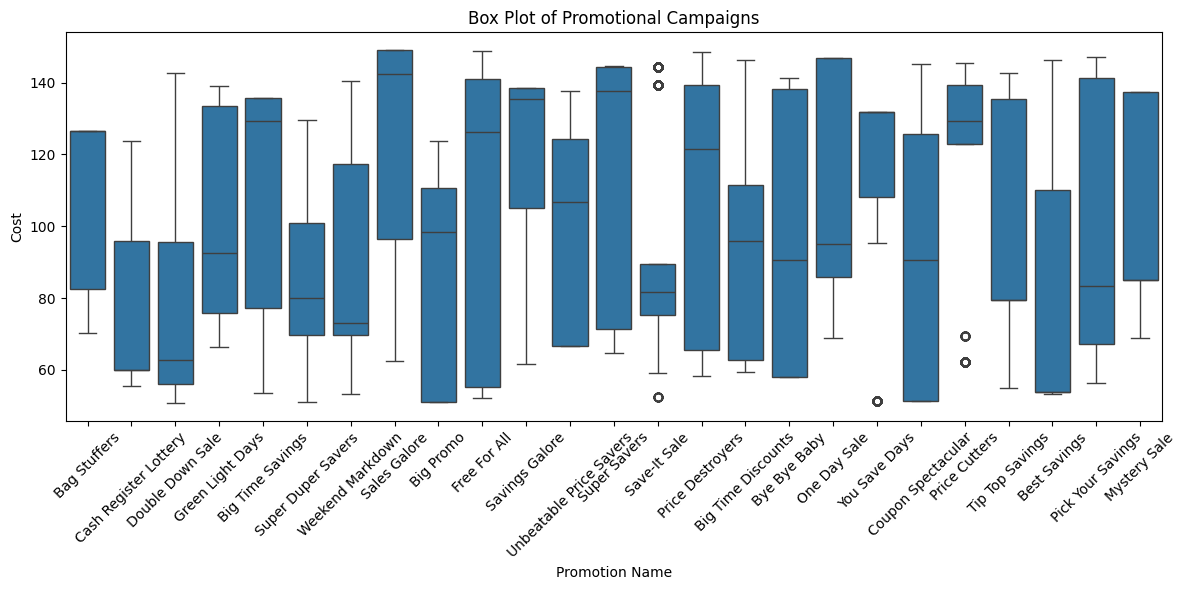

In [110]:
# Filter the original dataset to include only the filtered promotions
filtered_data = data[data['promotion_name'].isin(filtered_promos)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='promotion_name', y='cost', data=filtered_data)
plt.title('Box Plot of Promotional Campaigns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Promotion Name')
plt.ylabel('Cost')
plt.tight_layout()

# Show the plot
plt.show()